# Sentiment Analysis on Twitter Data

## 1. Problem Statement

The goal is to __analyze and predict__ whether the text is giving positive or negative sentiment using __Logistic Regression, Decision Tree, Random Forests__.

## 2. Data Loading and Description

- The dataset consists the information about the tweets and their sentiment as target variable. Various variables present in the data includes Date of tweet, Flag, User details etc.

- The dataset comprises of __1.6 Million observations of 6 columns__.

#### Importing packages

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import warnings
import string
%matplotlib inline
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier

from sklearn.cluster import KMeans

from scipy.stats import uniform
from collections import Counter

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

#import nltk
#from prettytable import PrettyTable
#from sklearn import metrics
#from nltk.stem.porter import PorterStemmer


Bad key "text.kerning_factor" on line 4 in
C:\Anaconda3\envs\gputest\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Columns in the dataset
Columns = ["Target", "Id's", "Date", "Flag", "User", "Text"]

#### Importing the Dataset

In [3]:
df = pd.read_csv("trainingdata.csv", encoding='ISO-8859-1' , names=Columns)
df

,Target,Id's,Date,Flag,User,Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [ ]:
# checking missing values
mv=pd.DataFrame(df.isnull().sum())
mv=mv.reset_index()
mv= mv.rename(columns={'index':'Variables',0:'Missing percentage'})
mv

- There are no missing values in the dataset

In [6]:
df['Text'].values

array(["@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D",
       "is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!",
       '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds',
       ..., 'Are you ready for your MoJo Makeover? Ask me for details ',
       'Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur ',
       'happy #charitytuesday @theNSPCC @SparksCharity @SpeakingUpH4H '],
      dtype=object)

In [7]:
# Different vales in the target columns
df['Target'].unique()

array([0, 4], dtype=int64)

In [8]:
df

,Target,Id's,Date,Flag,User,Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [9]:
# Sorted tweets based on date
sorted_data=df.sort_values('Date', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

In [10]:
#Deduplication of entries
final=sorted_data.drop_duplicates(subset={"Id's","Date","User","Text"}, keep='first', inplace=False)
final.shape

(1598315, 6)

In [11]:
(final['Id\'s'].size*1.0)/(df['Id\'s'].size*1.0)*100

99.8946875

In [12]:
decode_map = {0: 0, 4: 1}
def decode_sentiment(label):
    return decode_map[int(label)]

In [13]:
final['Target'] = final['Target'].apply(lambda x: decode_sentiment(x))

In [14]:
final = final.reset_index(drop=True)

In [15]:
final

,Target,Id's,Date,Flag,User,Text
0,0,1548274671,Fri Apr 17 20:30:31 PDT 2009,NO_QUERY,xoLovebug224,Working on my songg for aunt nan. kinda hard...
1,0,1548274782,Fri Apr 17 20:30:34 PDT 2009,NO_QUERY,Kerry_Baker,"can't sleep, it's 4.30am and i have to be up a..."
2,0,1548275152,Fri Apr 17 20:30:38 PDT 2009,NO_QUERY,glamorusindie81,wishing i could be at coachella this weekend ...
3,0,1548275569,Fri Apr 17 20:30:39 PDT 2009,NO_QUERY,WOnet,"Well, @LilWO was having a tough day/night. Wan..."
4,0,1548275799,Fri Apr 17 20:30:43 PDT 2009,NO_QUERY,jessicakornberg,taking some much needed naked time. too bad i...
...,...,...,...,...,...,...
1598310,1,1936103061,Wed May 27 07:27:38 PDT 2009,NO_QUERY,LizAnjos,"@NintendoRed sometimes, you just have to let go!"
1598311,1,1936103122,Wed May 27 07:27:38 PDT 2009,NO_QUERY,TiernanDouieb,@misswiz ah. Perhaps point her in the directio...
1598312,1,1936103130,Wed May 27 07:27:38 PDT 2009,NO_QUERY,ExpertDater,@SingleInThe604 Nice to meet you u too! Im gla...
1598313,1,1936103138,Wed May 27 07:27:38 PDT 2009,NO_QUERY,bpende,"@ChrisCavs : I love you, man... you making me ..."


In [16]:
#Before starting the next phase of preprocessing lets see the number ofentries left
print(final.shape)
#How many positive and negative reviews are present in our dataset?
final['Target'].value_counts()

(1598315, 6)


0    799160
1    799155
Name: Target, dtype: int64

In [17]:
sent = final['Text'].values[40]
print(sent)

Is heading to bed after a long day of meetings, sushi and wine!  Plus I have a cold. 


# Preprocessing of Text Data

In [18]:
# https://stackoverflow.com/a/47091490/4084039
import re
def decontracted(phrase):
# specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"don\'t", "do not", phrase)
# general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [19]:
# Applying decontration on one of the reviews
sent = decontracted(sent)
print(sent)

Is heading to bed after a long day of meetings, sushi and wine!  Plus I have a cold. 


In [20]:
# Stop words Removal

stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
"you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or','because', 'as', 'until', 'while', 'of', \
'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out','on', 'off', 'over', 'under', 'again', 'further',\
'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
's', 't', 'can', 'will', 'just', 'don', "don't", 'should',"should've", 'now', 'd', 'll', 'm', 'o', 're', \
've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't",'didn', "didn't", 'doesn', "doesn't", 'hadn',\
"hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
"mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn',"shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
'won', "won't", 'wouldn', "wouldn't"])

In [21]:
from bs4 import BeautifulSoup

In [22]:
# Combining all the above stundents
from tqdm import tqdm
preprocessed_reviews = []
# tqdm is for printing the status bar
for sentance in tqdm(final['Text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_reviews.append(sentance.strip())

100%|██████████████████████████████████████████████████████████████████████| 1598315/1598315 [19:28<00:00, 1367.85it/s]


In [23]:
final['CleanedText']=preprocessed_reviews #adding a column of CleanedText which displays the data after pre-processing of the review

In [24]:
preprocessed_reviews[50]

'ravels teams lost yesterday'

In [25]:
#final = final.reset_index(drop=True)

In [30]:
final

,Target,Id's,Date,Flag,User,Text,CleanedText
0,0,1548274671,Fri Apr 17 20:30:31 PDT 2009,NO_QUERY,xoLovebug224,Working on my songg for aunt nan. kinda hard...,working songg aunt nan kinda hard crying write
1,0,1548274782,Fri Apr 17 20:30:34 PDT 2009,NO_QUERY,Kerry_Baker,"can't sleep, it's 4.30am and i have to be up a...",not sleep
2,0,1548275152,Fri Apr 17 20:30:38 PDT 2009,NO_QUERY,glamorusindie81,wishing i could be at coachella this weekend ...,wishing could coachella weekend trying figure ...
3,0,1548275569,Fri Apr 17 20:30:39 PDT 2009,NO_QUERY,WOnet,"Well, @LilWO was having a tough day/night. Wan...",well lilwo tough day night wanted tinkfan lay ...
4,0,1548275799,Fri Apr 17 20:30:43 PDT 2009,NO_QUERY,jessicakornberg,taking some much needed naked time. too bad i...,taking much needed naked time bad alone naked ...
...,...,...,...,...,...,...,...
1598310,1,1936103061,Wed May 27 07:27:38 PDT 2009,NO_QUERY,LizAnjos,"@NintendoRed sometimes, you just have to let go!",nintendored sometimes let go
1598311,1,1936103122,Wed May 27 07:27:38 PDT 2009,NO_QUERY,TiernanDouieb,@misswiz ah. Perhaps point her in the directio...,misswiz ah perhaps point direction nicer one
1598312,1,1936103130,Wed May 27 07:27:38 PDT 2009,NO_QUERY,ExpertDater,@SingleInThe604 Nice to meet you u too! Im gla...,nice meet u im glad u enjoyed article
1598313,1,1936103138,Wed May 27 07:27:38 PDT 2009,NO_QUERY,bpende,"@ChrisCavs : I love you, man... you making me ...",chriscavs love man making feel better time


- Taken 100,000 entries out of 1.6 Million enteries due to limitations on computational power.

In [34]:
polarity=pd.DataFrame(final.head(100000),columns=['Target'])
X=pd.DataFrame(final.head(100000))

In [36]:
polarity.value_counts()

Target
0         62999
1         37001
dtype: int64

# Preparing X and y using pandas

In [37]:
X_1, X_test, y_1, y_test = train_test_split(X, polarity, test_size=0.2, random_state=0)

# Text Vectorization

### Bag of Words

In [39]:
count_vect = CountVectorizer() #in scikit-learn
count_vect.fit(X_train['CleanedText'].values)
bow_train = count_vect.transform(X_train['CleanedText'].values)
bow_cv = count_vect.transform(X_cv['CleanedText'].values)
bow_test = count_vect.transform(X_test['CleanedText'].values)
print("the shape of out text BOW train vectorizer ",bow_train.get_shape())
print("the shape of out text BOW cv vectorizer ",bow_cv.get_shape())
print("the shape of out text BOW test vectorizer ",bow_test.get_shape())

the shape of out text BOW train vectorizer  (60000, 55848)
the shape of out text BOW cv vectorizer  (20000, 55848)
the shape of out text BOW test vectorizer  (20000, 55848)


In [40]:
ss = StandardScaler(with_mean=False)
ss.fit(bow_train)
std_bow_train = ss.transform(bow_train)
std_bow_cv = ss.transform(bow_cv)
std_bow_test = ss.transform(bow_test)
print(std_bow_train.shape)
print(std_bow_cv.shape)
print(std_bow_test.shape)

(60000, 55848)
(20000, 55848)
(20000, 55848)


# TF-IDF

In [151]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
tf_idf_vect.fit(X_train['CleanedText'].values)
tfidf_train = tf_idf_vect.transform(X_train['CleanedText'].values)
tfidf_cv = tf_idf_vect.transform(X_cv['CleanedText'].values)
tfidf_test = tf_idf_vect.transform(X_test['CleanedText'].values)
print("the shape of out text TFIDF train vectorizer ",tfidf_train.get_shape())
print("the shape of out text TFIDF cv vectorizer ",tfidf_cv.get_shape())
print("the shape of out text TFIDF test vectorizer ",tfidf_test.get_shape())

the shape of out text TFIDF train vectorizer  (60000, 334854)
the shape of out text TFIDF cv vectorizer  (20000, 334854)
the shape of out text TFIDF test vectorizer  (20000, 334854)


In [42]:
ss = StandardScaler(with_mean=False)
ss.fit(tfidf_train)
std_tfidf_train = ss.transform(tfidf_train)
std_tfidf_cv = ss.transform(tfidf_cv)
std_tfidf_test = ss.transform(tfidf_test)
print(std_tfidf_train.shape)
print(std_tfidf_cv.shape)
print(std_tfidf_test.shape)

(60000, 334854)
(20000, 334854)
(20000, 334854)


##  Word2Vec

In [43]:
# Train your own Word2Vec model using your own text corpus
i=0
list_of_sentance=[]
for sentance in X_train['CleanedText'].values:
    list_of_sentance.append(sentance.split())

In [44]:
w2v_model=Word2Vec(list_of_sentance,min_count=5,size=50, workers=4)
print(w2v_model.wv.most_similar('great'))
print('='*50)
print(w2v_model.wv.most_similar('worst'))

[('enjoy', 0.8578964471817017), ('amazing', 0.8513749241828918), ('best', 0.8501200675964355), ('awesome', 0.8364564776420593), ('wonderful', 0.8343069553375244), ('every', 0.834027111530304), ('lovely', 0.8234403729438782), ('fun', 0.8176812529563904), ('blessed', 0.8149300813674927), ('first', 0.8134927153587341)]
[('terrible', 0.9895369410514832), ('miserable', 0.9886969327926636), ('eaten', 0.9886363744735718), ('without', 0.986503541469574), ('somewhat', 0.9849056601524353), ('crappy', 0.9838466048240662), ('windy', 0.9837362766265869), ('short', 0.9836148023605347), ('gotten', 0.9831554889678955), ('inside', 0.9824363589286804)]


In [45]:
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  7611
sample words  ['bored', 'like', 'crap', 'especially', 'considering', 'need', 'work', 'tomorrow', 'watching', 'larry', 'king', 'live', 'cable', 'went', 'ff', 'able', 'survive', 'punishment', 'go', 'cooks', 'kills', 'yeyy', 'rain', 'finally', 'stopped', 'gonna', 'nice', 'tomorrowww', 'doubt', 'probably', 'never', 'change', 'bummer', 'huh', 'literally', 'want', 'blood', 'back', 'complain', 'driving', 'alley', 'tho', 'hood', 'come', 'lab', 'next', 'week', 'miss', 'hehe', 'temp']


## Converting text into vectors using Avg W2V

In [46]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

100%|██████████████████████████████████████████████████████████████████████████| 60000/60000 [00:53<00:00, 1128.21it/s]

60000
50


In [47]:
# Train your own Word2Vec model using your own text corpus
i=0
list_of_cv=[]
for sentance in X_cv['CleanedText'].values:
    list_of_cv.append(sentance.split())

In [48]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors2 = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_cv): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors2.append(sent_vec)
print(len(sent_vectors2))
print(len(sent_vectors2[0]))

100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:20<00:00, 963.44it/s]

20000
50


In [49]:
# Train your own Word2Vec model using your own text corpus
i=0
list_of_test=[]
for sentance in X_test['CleanedText'].values:
    list_of_test.append(sentance.split())

In [50]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors3 = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_test): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors3.append(sent_vec)
print(len(sent_vectors3))
print(len(sent_vectors3[0]))

100%|██████████████████████████████████████████████████████████████████████████| 20000/20000 [00:17<00:00, 1120.97it/s]

20000
50


In [51]:
#ss = StandardScaler(with_mean=False)
ss.fit(sent_vectors)
std_avgw2v_train = ss.transform(sent_vectors)
std_avgw2v_cv = ss.transform(sent_vectors2)
std_avgw2v_test = ss.transform(sent_vectors3)
print(std_avgw2v_train.shape)
print(std_avgw2v_cv.shape)
print(std_avgw2v_test.shape)

(60000, 50)
(20000, 50)
(20000, 50)


# Applying Logistic Regression


### Applying Logistic Regression with L1 regularization on BOW

In [52]:
#y_train = y_train.values.reshape(len(y_train))

tuned_parameters = [{'C': [10**-4,10**-3,10**-2,10**-1,10**0, 10**1,10**2,10**3,10**4]}]
clfb_lr = GridSearchCV(LogisticRegression(penalty='l1',solver='liblinear'), tuned_parameters, scoring = 'roc_auc', n_jobs=-1, cv=5)
clfb_lr.fit(std_bow_train, y_train)
print(clfb_lr.best_estimator_)
print(clfb_lr.score(std_bow_test, y_test))

LogisticRegression(C=0.01, penalty='l1', solver='liblinear')
0.8505937650499357


### Applying Logistic Regression with L2 regularization on BOW

In [53]:
#y_train = y_train.values.reshape(len(y_train))

tuned_parameters = [{'C': [10**-4,10**-3,10**-2,10**-1,10**0, 10**1,10**2,10**3,10**4]}]
clfb_lr = GridSearchCV(LogisticRegression(penalty='l2'), tuned_parameters, scoring = 'roc_auc', n_jobs=-1, cv=5)
clfb_lr.fit(std_bow_train, y_train)
print(clfb_lr.best_estimator_)
print(clfb_lr.score(std_bow_test, y_test))

LogisticRegression(C=0.0001)
0.813702889192626


# Hyperparameter Tuning

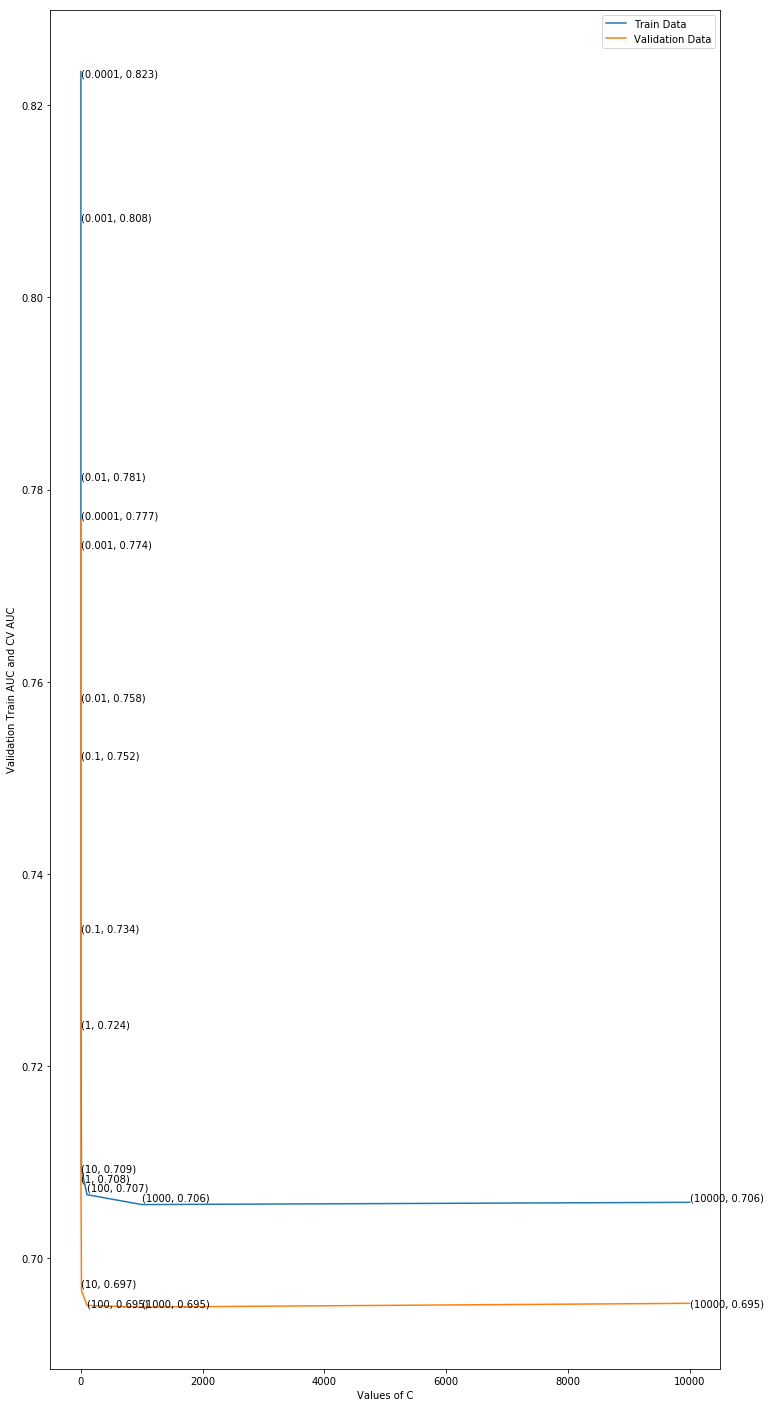

the cv_scores for each alpha value in training data is :  [0.823 0.808 0.781 0.752 0.724 0.709 0.707 0.706 0.706]
the cv_scores for each alpha value in CV data is :  [0.777 0.774 0.758 0.734 0.708 0.697 0.695 0.695 0.695]


In [54]:
y_train = y_train.values.reshape(len(y_train))
y_cv = y_cv.values.reshape(len(y_cv))

C= [10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]

cv_scores = []
cv_scores2 = []

# perform 10-fold cross validation
i = 10**-4
while(i<=10**4):
    clfb_lr = LogisticRegression(C=i, penalty='l2', n_jobs=-1);

    scores = cross_val_score(clfb_lr, std_bow_train, y_train, cv=5, scoring='roc_auc')
    cv_scores.append(scores.mean())
    
    scores2 = cross_val_score(clfb_lr, std_bow_cv, y_cv, cv=5, scoring='roc_auc')
    cv_scores2.append(scores2.mean())
    
    i=i*10

fig = plt.figure(figsize=(12,25))
plt.plot(C, cv_scores, label='Train Data' )
plt.plot(C, cv_scores2, label='Validation Data')

for xy in zip(C, np.round(cv_scores,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
for xy in zip(C, np.round(cv_scores2,3),):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Values of C')
plt.ylabel('Validation Train AUC and CV AUC')
plt.legend(loc='upper right')
plt.show()

print("the cv_scores for each alpha value in training data is : ", np.round(cv_scores,3))
print("the cv_scores for each alpha value in CV data is : ", np.round(cv_scores2,3))

- Selecting C=10 as hyperparameter from above graph

In [55]:
clfb_lr = LogisticRegression(C=10, penalty='l2', n_jobs=-1);
clfb_lr.fit(std_bow_train,y_train)
pred_bow = clfb_lr.predict_proba(std_bow_test)[:,1]
roc_auc_test = roc_auc_score(y_test, pred_bow, average='micro')
print('\n****Test roc_auc_test_score for C = 10 is %f' % (roc_auc_test))


****Test roc_auc_test_score for C = 10 is 0.712512


# ROC-AUC Curve

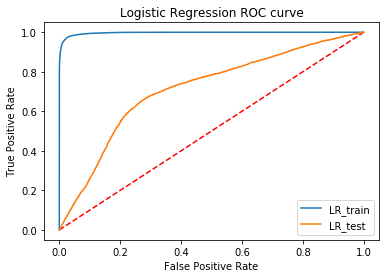

In [56]:
#https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

y_pred_train = clfb_lr.predict_proba(std_bow_train)[:,1]
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_train)

y_pred_test = clfb_lr.predict_proba(std_bow_test)[:,1]
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test)

plt.title('Receiver Operating Characteristic')
plt.figure(1)
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr_train,tpr_train, label='LR_train')
plt.plot(fpr_test,tpr_test, label='LR_test')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC curve')
plt.legend(loc = 'lower right')
plt.show()

# Confusion Matrix

------------------------------ Confusion matrix ------------------------------


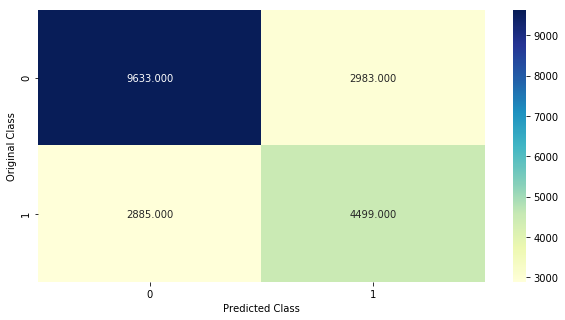

In [57]:
# Case Study : Personalized Cancer Diagnosis
pred_bow = clfb_lr.predict(std_bow_test)

def plot_confusion_matrix(y_test, pred_bow):
    C = confusion_matrix(y_test, pred_bow)
    labels = [0,1]
    print("-"*30, "Confusion matrix", "-"*30)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
plot_confusion_matrix(y_test, pred_bow)

### Feature Importance on BOW

#### Top 20 important features of positive class

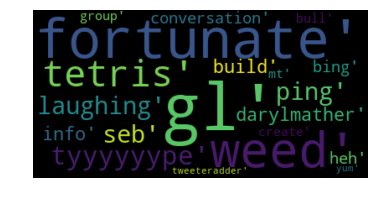

In [58]:
from wordcloud import WordCloud

clfb_lr = LogisticRegression(C=10, penalty='l2', n_jobs=-1);
clfb_lr.fit(std_bow_train, y_train);
prob = clfb_lr.coef_[0,:].argsort()
words = np.take(count_vect.get_feature_names(), prob[-20:])
wordcloud = WordCloud().generate(str(words))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Top 20 important features of negative class

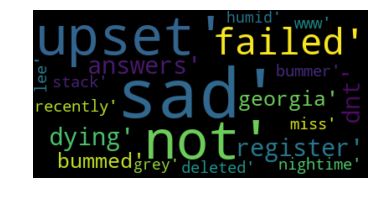

In [59]:
from wordcloud import WordCloud

clfb_lr = LogisticRegression(C=10, penalty='l2', n_jobs=-1);
clfb_lr.fit(std_bow_train, y_train);
prob = clfb_lr.coef_[0,:].argsort()
words = np.take(count_vect.get_feature_names(), prob[:20])
wordcloud = WordCloud().generate(str(words))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Logistic Regression on TFIDF

###  Applying Logistic Regression with L1 regularization on TFIDF

In [60]:
tuned_parameters = [{'C': [10**-4,10**-3,10**-2,10**-1,10**0, 10**1,10**2,10**3,10**4]}]
clft_lr = GridSearchCV(LogisticRegression(penalty='l1',solver='liblinear'), tuned_parameters, scoring = 'roc_auc', n_jobs=-1, cv=5)
clft_lr.fit(std_tfidf_train, y_train)
print(clft_lr.best_estimator_)
print(clft_lr.score(std_tfidf_test, y_test))

LogisticRegression(C=0.01, penalty='l1', solver='liblinear')
0.8616871886101742


###  Applying Logistic Regression with L2 regularization on TFIDF

In [61]:
#y_train = y_train.values.reshape(len(y_train))

tuned_parameters = [{'C': [10**-4,10**-3,10**-2,10**-1,10**0, 10**1,10**2,10**3,10**4]}]
clft_lr = GridSearchCV(LogisticRegression(penalty='l2'), tuned_parameters, scoring = 'roc_auc', n_jobs=-1, cv=5)
clft_lr.fit(std_tfidf_train, y_train)
print(clft_lr.best_estimator_)
print(clft_lr.score(std_tfidf_test, y_test))

LogisticRegression(C=0.0001)
0.8266410248108819


# Hyperparameter Tuning

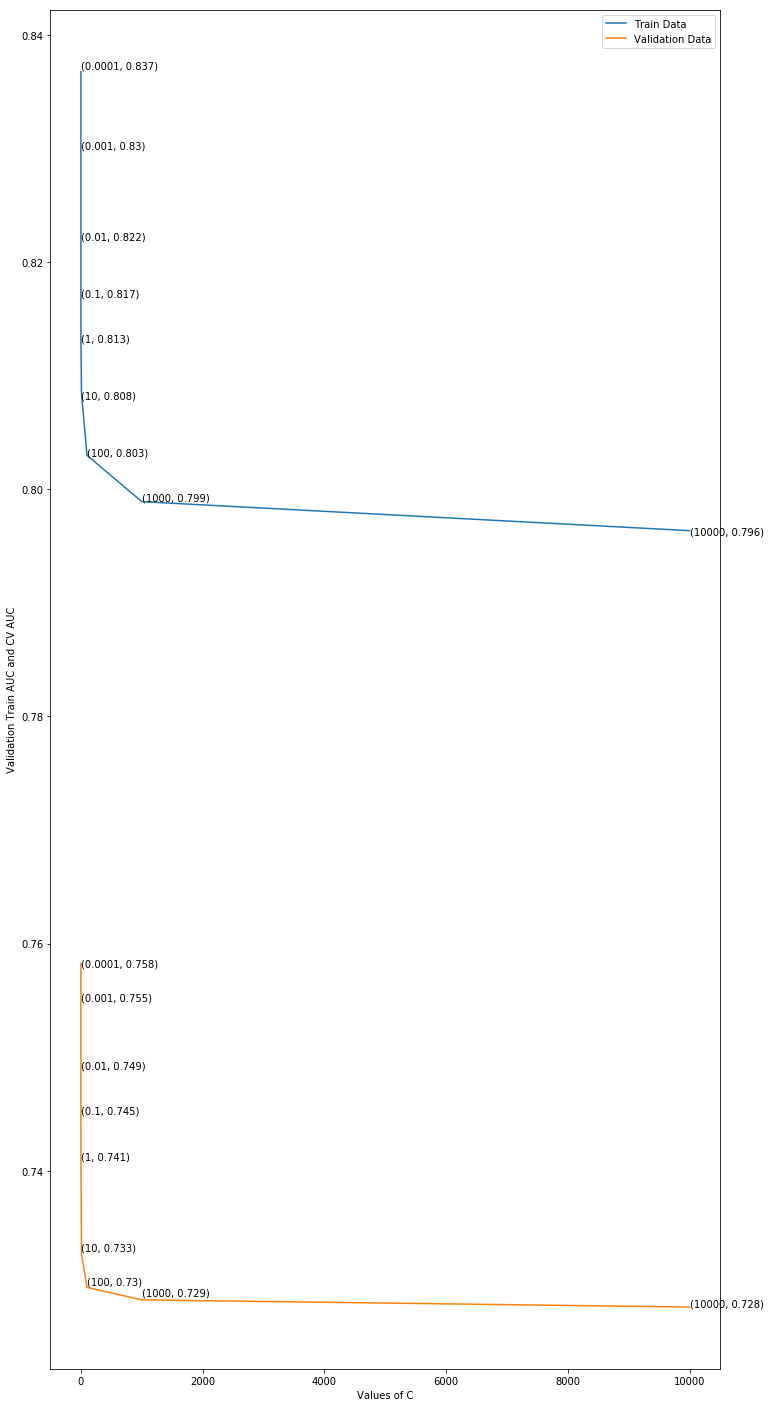

the cv_scores for each alpha value in training data is :  [0.837 0.83  0.822 0.817 0.813 0.808 0.803 0.799 0.796]
the cv_scores for each alpha value in CV data is :  [0.758 0.755 0.749 0.745 0.741 0.733 0.73  0.729 0.728]


In [62]:
#y_train = y_train.values.reshape(len(y_train))
#y_cv = y_cv.values.reshape(len(y_cv))

C= [10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]

cv_scores = []
cv_scores2 = []

# perform 10-fold cross validation
i = 10**-4
while(i<=10**4):
    clft_lr = LogisticRegression(C=i, penalty='l2', n_jobs=-1);

    scores = cross_val_score(clft_lr, std_tfidf_train, y_train, cv=5, scoring='roc_auc')
    cv_scores.append(scores.mean())
    
    scores2 = cross_val_score(clft_lr, std_tfidf_cv, y_cv, cv=5, scoring='roc_auc')
    cv_scores2.append(scores2.mean())
    
    i=i*10

fig = plt.figure(figsize=(12,25))
plt.plot(C, cv_scores, label='Train Data' )
plt.plot(C, cv_scores2, label='Validation Data')

for xy in zip(C, np.round(cv_scores,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
for xy in zip(C, np.round(cv_scores2,3),):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Values of C')
plt.ylabel('Validation Train AUC and CV AUC')
plt.legend(loc='upper right')
plt.show()

print("the cv_scores for each alpha value in training data is : ", np.round(cv_scores,3))
print("the cv_scores for each alpha value in CV data is : ", np.round(cv_scores2,3))

- Selecting C=10 from above graph

In [63]:
clft_lr = LogisticRegression(C=10, penalty='l2', n_jobs=-1);
clft_lr.fit(std_tfidf_train,y_train)
pred_tfidf = clft_lr.predict_proba(std_tfidf_test)[:,1]
roc_auc_test = roc_auc_score(y_test, pred_tfidf, average='micro')
print('\n****Test roc_auc_test_score for C = 10 is %f' % (roc_auc_test))


****Test roc_auc_test_score for C = 10 is 0.807784


# ROC- AUC Curve

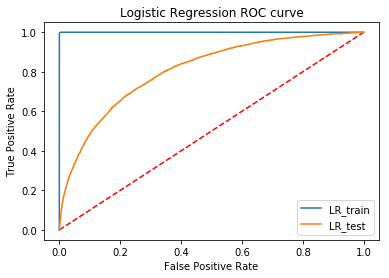

In [64]:
#https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

y_pred_train = clft_lr.predict_proba(std_tfidf_train)[:,1]
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_train)

y_pred_test = clft_lr.predict_proba(std_tfidf_test)[:,1]
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test)

plt.title('Receiver Operating Characteristic')
plt.figure(1)
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr_train,tpr_train, label='LR_train')
plt.plot(fpr_test,tpr_test, label='LR_test')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC curve')
plt.legend(loc = 'lower right')
plt.show()

# Confusion Matrix

------------------------------ Confusion matrix ------------------------------


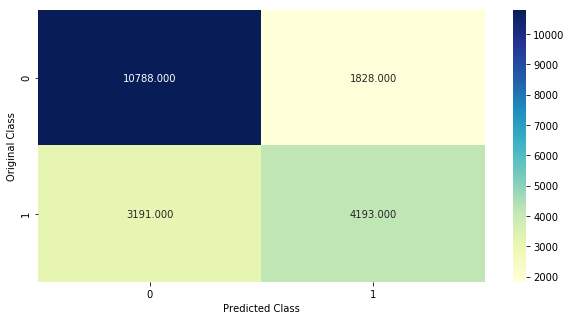

In [65]:
# Case Study : Personalized Cancer Diagnosis
pred_tfidf = clft_lr.predict(std_tfidf_test)

def plot_confusion_matrix(y_test, pred_tfidf):
    C = confusion_matrix(y_test, pred_tfidf)
    labels = [0,1]
    print("-"*30, "Confusion matrix", "-"*30)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
plot_confusion_matrix(y_test, pred_tfidf)

### Feature Importance on TFIDF

####  Top 20 important features of positive class

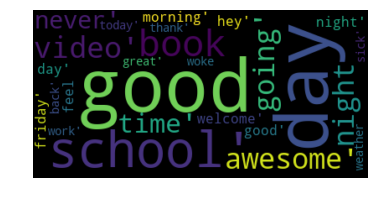

In [66]:
from wordcloud import WordCloud

clft_lr = LogisticRegression(C=10, penalty='l2', n_jobs=-1);
clft_lr.fit(std_tfidf_train, y_train);
prob = clft_lr.coef_[0,:].argsort()
words = np.take(tf_idf_vect.get_feature_names(), prob[-20:])
wordcloud = WordCloud().generate(str(words))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Top 20 important features of negative class

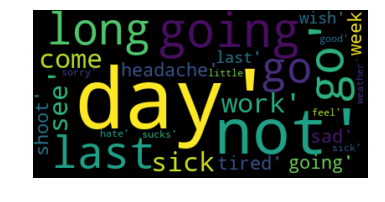

In [67]:
from wordcloud import WordCloud

clft_lr = LogisticRegression(C=10, penalty='l2', n_jobs=-1);
clft_lr.fit(std_tfidf_train, y_train);
prob = clft_lr.coef_[0,:].argsort()
words = np.take(tf_idf_vect.get_feature_names(), prob[:20])
wordcloud = WordCloud().generate(str(words))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()




























































## Logistic Regression on AVG W2V

### Applying Logistic Regression with L1 regularization on AVG W2V

In [68]:
tuned_parameters = [{'C': [10**-4,10**-3,10**-2,10**-1,10**0, 10**1,10**2,10**3,10**4]}]
clfw_lr = GridSearchCV(LogisticRegression(penalty='l1',solver='liblinear'), tuned_parameters, scoring = 'roc_auc', n_jobs=-1, cv=5)
clfw_lr.fit(std_avgw2v_train, y_train)
print(clfw_lr.best_estimator_)
print(clfw_lr.score(std_avgw2v_test, y_test))

LogisticRegression(C=10000, penalty='l1', solver='liblinear')
0.7858629180146486


### Applying Logistic Regression with L2 regularization on AVG W2V

In [69]:
tuned_parameters = [{'C': [10**-4,10**-3,10**-2,10**-1,10**0, 10**1,10**2,10**3,10**4]}]
clfw_lr = GridSearchCV(LogisticRegression(penalty='l2'), tuned_parameters, scoring = 'roc_auc', n_jobs=-1, cv=5)
clfw_lr.fit(std_avgw2v_train, y_train)
print(clfw_lr.best_estimator_)
print(clfw_lr.score(std_avgw2v_test, y_test))

LogisticRegression(C=10000)
0.7844622327337518


# Hyperparameter Tuning

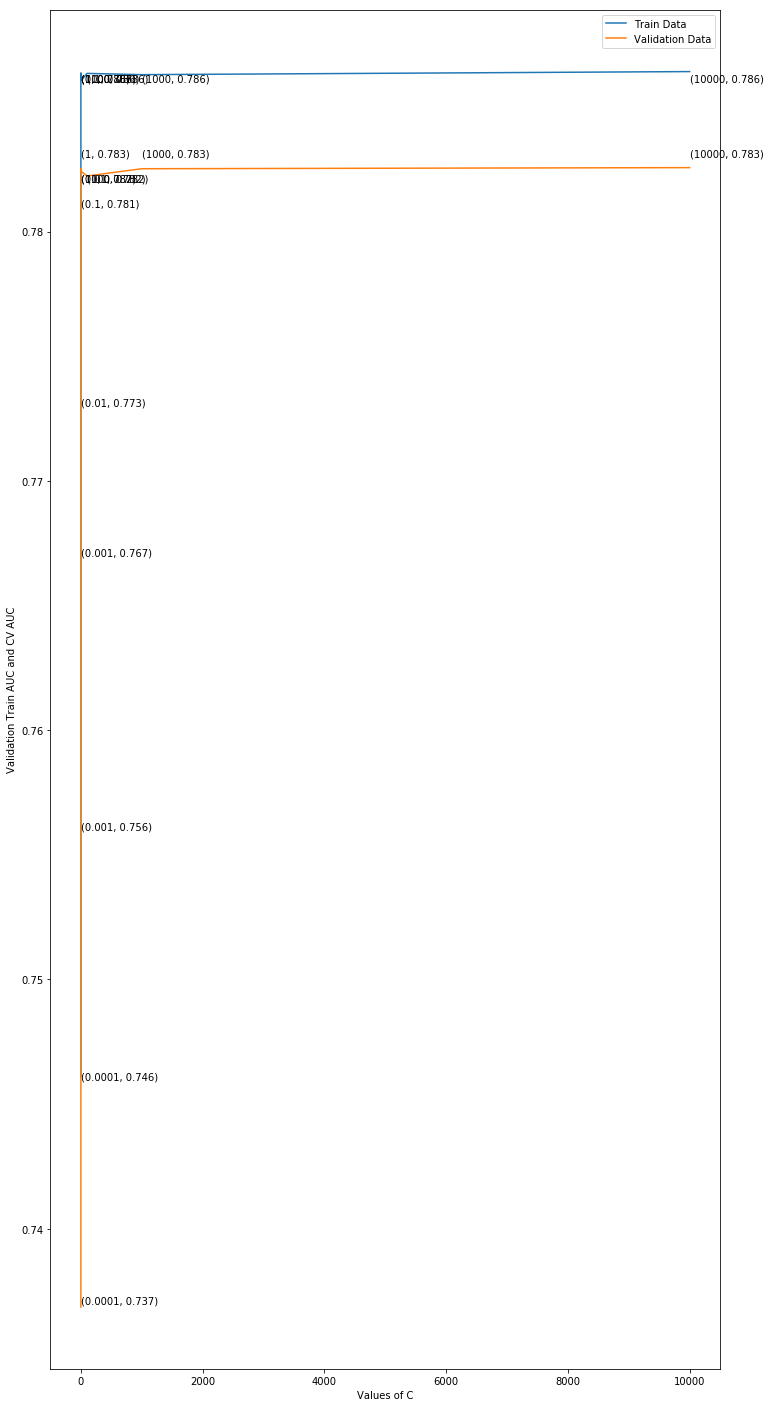

the cv_scores for each alpha value in training data is :  [0.746 0.767 0.782 0.786 0.786 0.786 0.786 0.786 0.786]
the cv_scores for each alpha value in CV data is :  [0.737 0.756 0.773 0.781 0.783 0.782 0.782 0.783 0.783]


In [70]:
#y_train = y_train.values.reshape(len(y_train))
#y_cv = y_cv.values.reshape(len(y_cv))

C= [10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]

cv_scores = []
cv_scores2 = []

# perform 10-fold cross validation
i = 10**-4
while(i<=10**4):
    clfw_lr = LogisticRegression(C=i, penalty='l2', n_jobs=-1);

    scores = cross_val_score(clfw_lr, std_avgw2v_train, y_train, cv=5, scoring='roc_auc')
    cv_scores.append(scores.mean())
    
    scores2 = cross_val_score(clfw_lr, std_avgw2v_cv, y_cv, cv=5, scoring='roc_auc')
    cv_scores2.append(scores2.mean())
    
    i=i*10

fig = plt.figure(figsize=(12,25))
plt.plot(C, cv_scores, label='Train Data' )
plt.plot(C, cv_scores2, label='Validation Data')

for xy in zip(C, np.round(cv_scores,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
for xy in zip(C, np.round(cv_scores2,3),):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Values of C')
plt.ylabel('Validation Train AUC and CV AUC')
plt.legend(loc='upper right')
plt.show()

print("the cv_scores for each alpha value in training data is : ", np.round(cv_scores,3))
print("the cv_scores for each alpha value in CV data is : ", np.round(cv_scores2,3))

- Selecting C=0.01 from above graph

In [71]:
clfw_lr = LogisticRegression(C=10**-2, penalty='l2', n_jobs=-1);
clfw_lr.fit(std_avgw2v_train,y_train)
pred_avgw2v = clfw_lr.predict_proba(std_avgw2v_test)[:,1]
roc_auc_test = roc_auc_score(y_test, pred_avgw2v, average='micro')
print('\n****Test roc_auc_test_score for C = 0.01 is %f' % (roc_auc_test))


****Test roc_auc_test_score for C = 0.01 is 0.780950


# ROC-AUC Curve

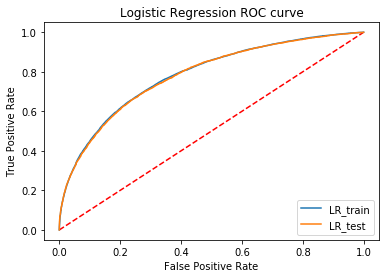

In [72]:
#https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

y_pred_train = clfw_lr.predict_proba(std_avgw2v_train)[:,1]
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_train)

y_pred_test = clfw_lr.predict_proba(std_avgw2v_test)[:,1]
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test)

plt.title('Receiver Operating Characteristic')
plt.figure(1)
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr_train,tpr_train, label='LR_train')
plt.plot(fpr_test,tpr_test, label='LR_test')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC curve')
plt.legend(loc = 'lower right')
plt.show()

# Confusion Matrix

------------------------------ Confusion matrix ------------------------------


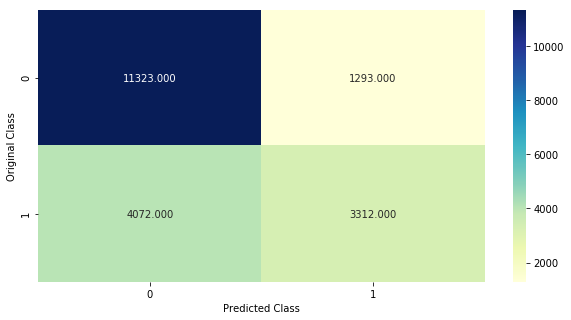

In [73]:
# Case Study : Personalized Cancer Diagnosis
pred_avgw2v = clfw_lr.predict(std_avgw2v_test)

def plot_confusion_matrix(y_test, pred_avgw2v):
    C = confusion_matrix(y_test, pred_avgw2v)
    labels = [0,1]
    print("-"*30, "Confusion matrix", "-"*30)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
plot_confusion_matrix(y_test, pred_avgw2v)

# Applying Decision Trees on BOW

##  Hyperparameter Tuning

In [74]:
max_depth = [1,5,10,50,100,500]
min_samples_split = [5,10,100,500]

parameters= [{'max_depth': [1,5,10,50,100,500], 'min_samples_split': [5,10,100,500]}]
clfb_dt = GridSearchCV(DecisionTreeClassifier(), parameters, scoring='roc_auc', cv=3)
clfb_dt.fit(std_bow_train, y_train)
scores_bow_train = clfb_dt.cv_results_['mean_test_score'].reshape(len(max_depth),len(min_samples_split))

In [75]:
max_depth = [1,5,10,50,100,500]
min_samples_split = [5,10,100,500]

parameters= [{'max_depth': [1,5,10,50,100,500], 'min_samples_split': [5,10,100,500]}]
clfb_dt = GridSearchCV(DecisionTreeClassifier(), parameters, scoring='roc_auc', cv=3)
clfb_dt.fit(std_bow_cv, y_cv)
scores_bow_cv = clfb_dt.cv_results_['mean_test_score'].reshape(len(max_depth),len(min_samples_split))

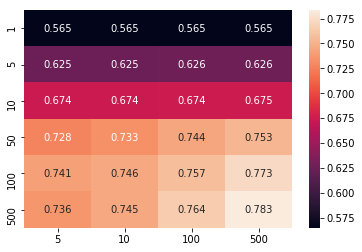

In [76]:
df_bow_train = pd.DataFrame(scores_bow_train ,index=max_depth, columns=min_samples_split)
ax = sns.heatmap(df_bow_train, annot=True, fmt='.3f')

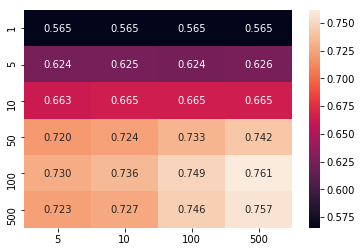

In [77]:
df_bow_cv = pd.DataFrame(scores_bow_cv ,index=max_depth, columns=min_samples_split)
ax = sns.heatmap(df_bow_cv, annot=True, fmt='.3f')

- Selecting max_depth = 100 , min_samples_split= 100 from above heatplots

In [80]:
from sklearn.calibration import CalibratedClassifierCV,calibration_curve

In [85]:
clfb_dt = DecisionTreeClassifier(max_depth = 100 , min_samples_split= 100)
clfb_dt_sigmoid = CalibratedClassifierCV(clfb_dt, cv=3, method='sigmoid')
clfb_dt_sigmoid.fit(std_bow_train,y_train)
pred_bow = clfb_dt_sigmoid.predict_proba(std_bow_test)[:,1]
roc_auc = roc_auc_score(y_test, pred_bow, average='micro')
print('\n****Test roc_auc_score for max_depth = 100 and min_samples_split = 100 is %f' % (roc_auc))


****Test roc_auc_score for max_depth = 100 and min_samples_split = 100 is 0.785787


# ROC-AUC Curve

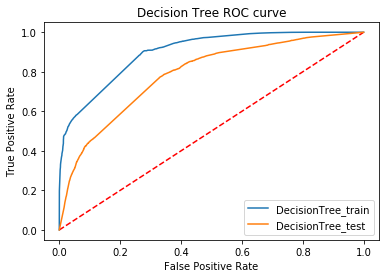

In [86]:
#https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

y_pred_train = clfb_dt_sigmoid.predict_proba(std_bow_train)[:,1]
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_train)

y_pred_test = clfb_dt_sigmoid.predict_proba(std_bow_test)[:,1]
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test)

plt.title('Receiver Operating Characteristic')
plt.figure(1)
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr_train,tpr_train, label='DecisionTree_train')
plt.plot(fpr_test,tpr_test, label='DecisionTree_test')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC curve')
plt.legend(loc = 'lower right')
plt.show()

# Confusion Matrix

------------------------------ Confusion matrix ------------------------------


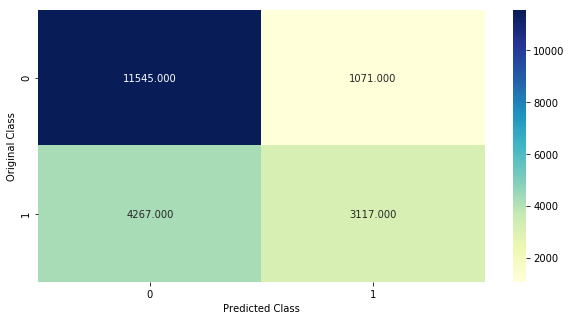

In [87]:
# Case Study : Personalized Cancer Diagnosis
pred_bow = clfb_dt_sigmoid.predict(std_bow_test)

def plot_confusion_matrix(y_test, pred_bow):
    C = confusion_matrix(y_test, pred_bow)
    labels = [0,1]
    print("-"*30, "Confusion matrix", "-"*30)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
plot_confusion_matrix(y_test, pred_bow)

#### Top 20 important features of positive class

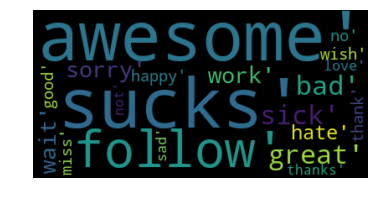

In [89]:
clfb_dt = DecisionTreeClassifier(max_depth = 100 , min_samples_split= 100)
clfb_dt.fit(std_bow_train,y_train)
prob = clfb_dt.feature_importances_.argsort()
words = np.take(count_vect.get_feature_names(), prob[-20:])
wordcloud = WordCloud().generate(str(words))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Top 20 important features of negative class

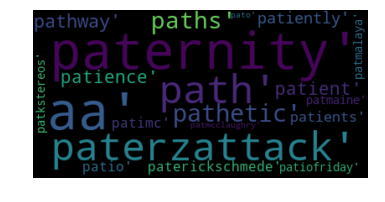

In [90]:
clfb_dt = DecisionTreeClassifier(max_depth = 100 , min_samples_split= 100)
clfb_dt.fit(std_bow_train,y_train)
prob = clfb_dt.feature_importances_.argsort()
words = np.take(count_vect.get_feature_names(), prob[:20])
wordcloud = WordCloud().generate(str(words))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [92]:
from IPython.display import Image


### Graphviz visualization of Decision Tree on BOW

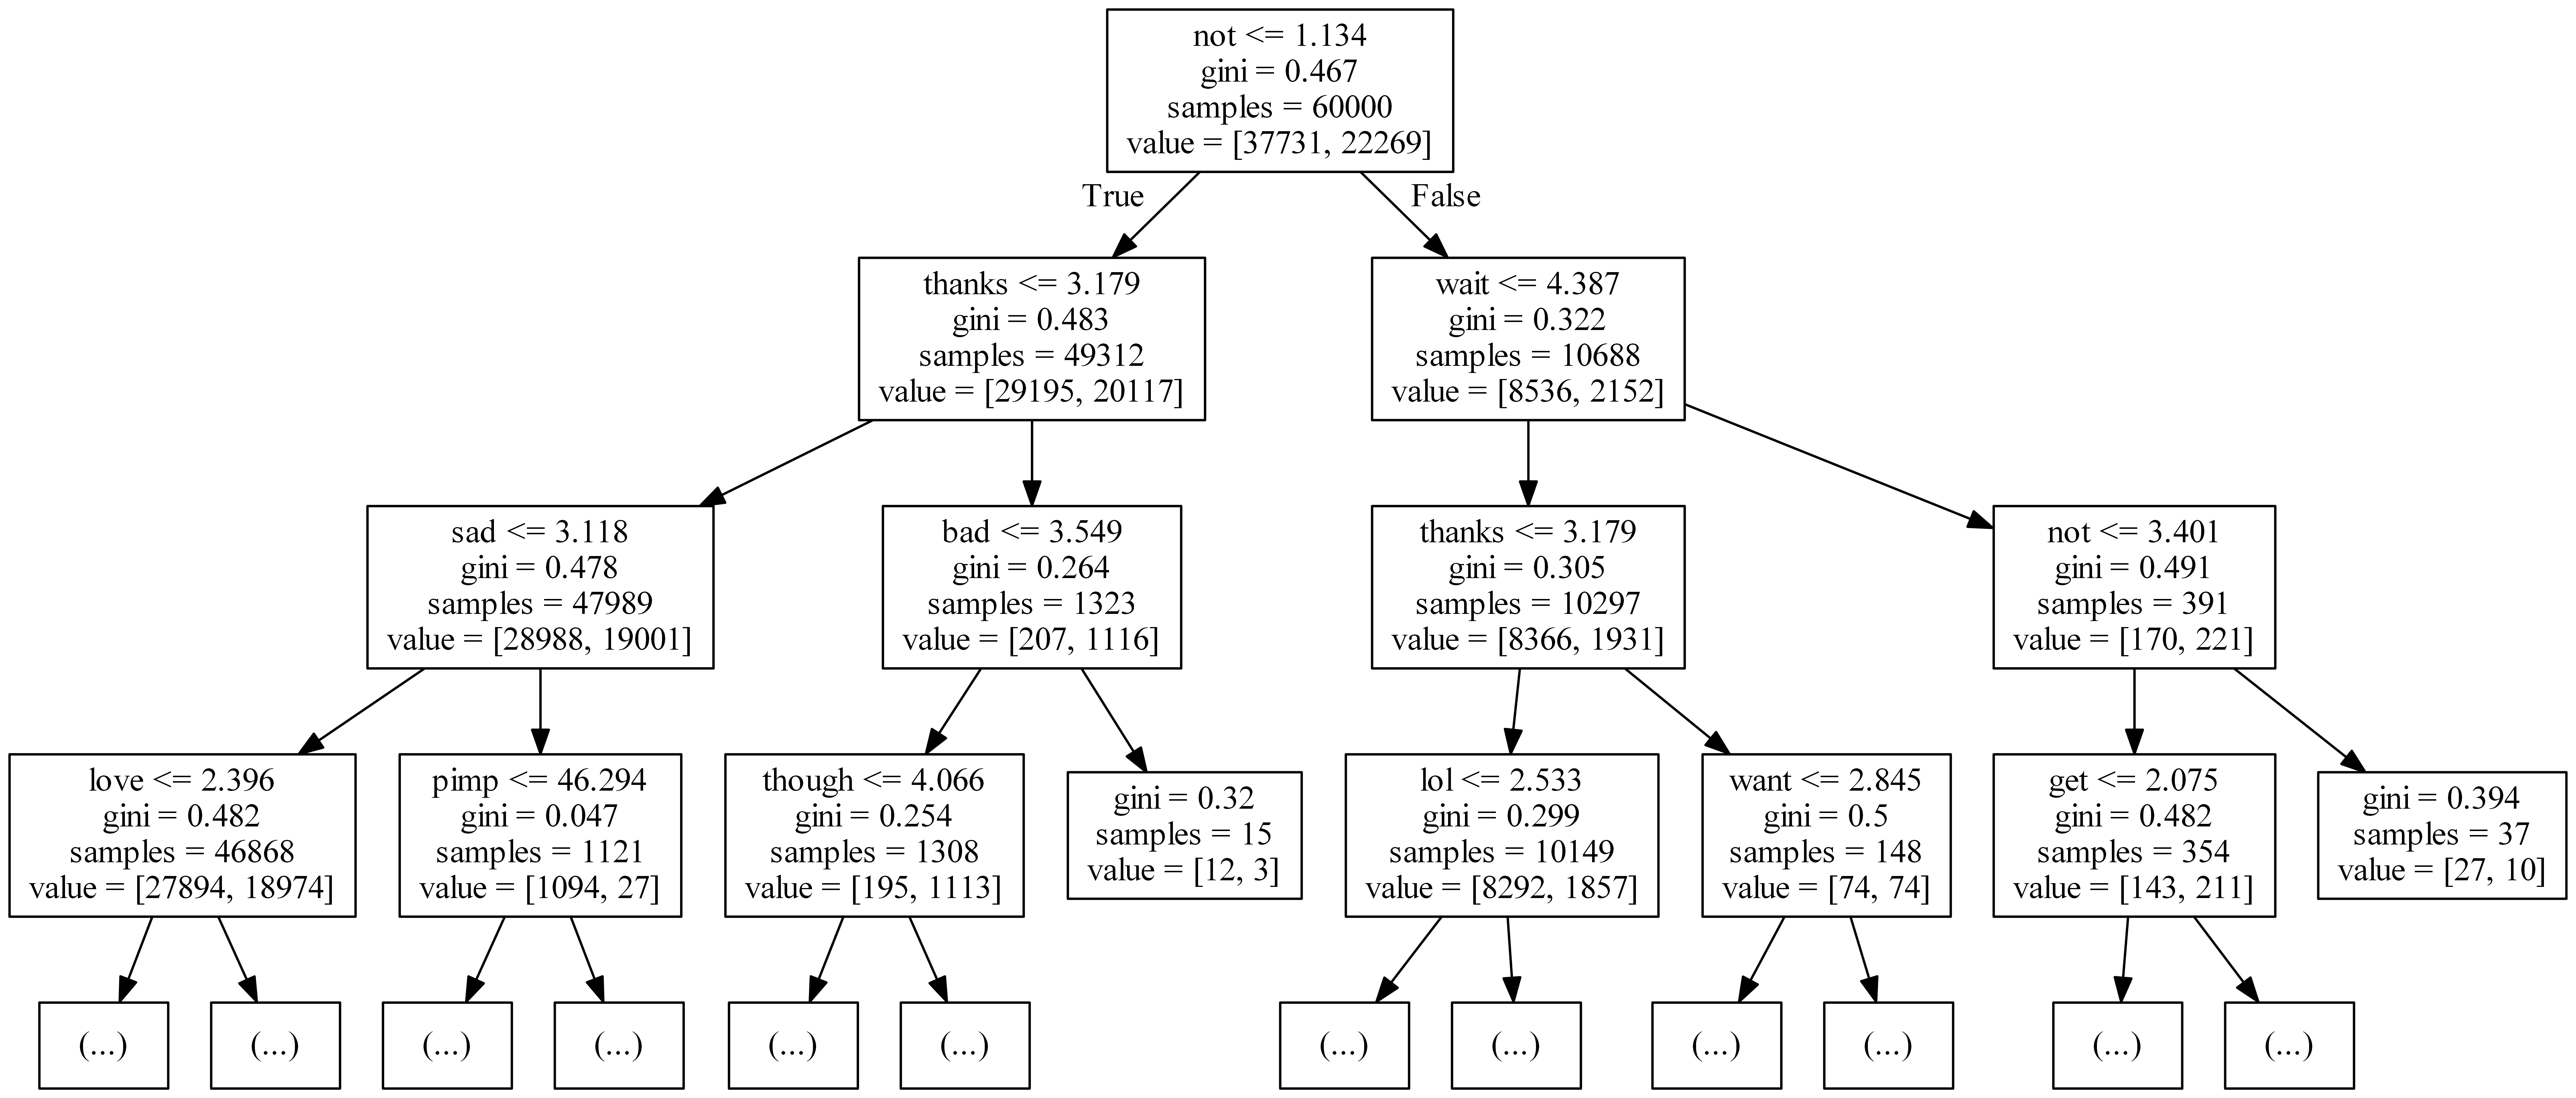

In [93]:
clfb_dt = clfb_dt.fit(std_bow_train, y_train)
export_graphviz(clfb_dt, out_file='tree.dot' ,max_depth=3, feature_names= count_vect.get_feature_names())
!dot -Tpng tree.dot -o tree_bow.png -Gdpi=600
Image(filename = 'tree_bow.png')

## Applying Decision Trees on TFIDF

# Hyperparameter Tuning

In [97]:
max_depth = [1,5,10,50,100,500]
min_samples_split = [5,10,100,500]

parameters= [{'max_depth': [1,5,10,50,100,500], 'min_samples_split': [5,10,100,500]}]
clft_dt = GridSearchCV(DecisionTreeClassifier(), parameters, scoring='roc_auc', cv=5)
clft_dt.fit(std_tfidf_train, y_train)
scores_tfidf_train = clft_dt.cv_results_['mean_test_score'].reshape(len(max_depth),len(min_samples_split))

In [98]:
max_depth = [1,5,10,50,100,500]
min_samples_split = [5,10,100,500]

parameters= [{'max_depth': [1,5,10,50,100,500], 'min_samples_split': [5,10,100,500]}]
clft_dt = GridSearchCV(DecisionTreeClassifier(), parameters, scoring='roc_auc', cv=5)
clft_dt.fit(std_tfidf_cv, y_cv)
scores_tfidf_cv = clft_dt.cv_results_['mean_test_score'].reshape(len(max_depth),len(min_samples_split))

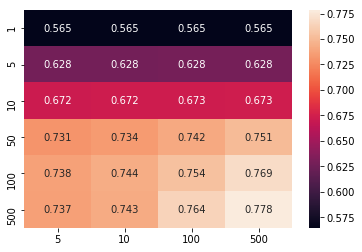

In [99]:
df_tfidf_train = pd.DataFrame(scores_tfidf_train ,index=max_depth, columns=min_samples_split)
ax = sns.heatmap(df_tfidf_train, annot=True, fmt='.3f')

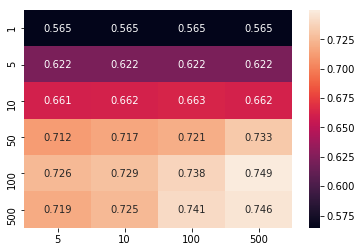

In [100]:
df_tfidf_cv = pd.DataFrame(scores_tfidf_cv ,index=max_depth, columns=min_samples_split)
ax = sns.heatmap(df_tfidf_cv, annot=True, fmt='.3f')

- Selecting max_depth = 100 , min_samples_split= 100 from above heatplots

In [ ]:
- Selecting max_depth = 100 , min_samples_split= 100 from above heatplots

In [101]:
clft_dt = DecisionTreeClassifier(max_depth = 100 , min_samples_split= 100)
clft_dt_sigmoid = CalibratedClassifierCV(clft_dt, cv=10, method='sigmoid')
clft_dt_sigmoid.fit(std_tfidf_train,y_train)
pred_tfidf = clft_dt_sigmoid.predict_proba(std_tfidf_test)[:,1]
roc_auc = roc_auc_score(y_test, pred_tfidf, average='micro')
print('\n****Test roc_auc_score for max_depth = 100 and min_samples_split = 100 is %f' % (roc_auc))


****Test roc_auc_score for max_depth = 100 and min_samples_split = 100 is 0.779810


# ROC-AUC Curve

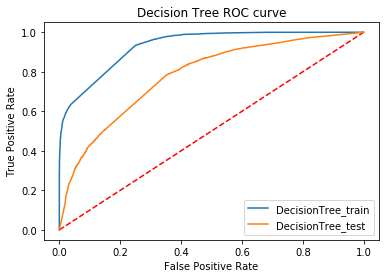

In [102]:
#https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

y_pred_train = clft_dt_sigmoid.predict_proba(std_tfidf_train)[:,1]
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_train)

y_pred_test = clft_dt_sigmoid.predict_proba(std_tfidf_test)[:,1]
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test)

plt.title('Receiver Operating Characteristic')
plt.figure(1)
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr_train,tpr_train, label='DecisionTree_train')
plt.plot(fpr_test,tpr_test, label='DecisionTree_test')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC curve')
plt.legend(loc = 'lower right')
plt.show()

## Confusion Matrix

------------------------------ Confusion matrix ------------------------------


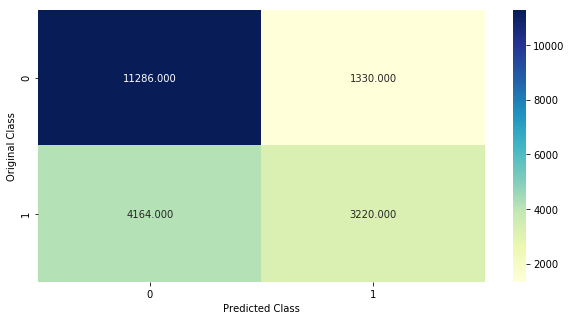

In [103]:
# Case Study : Personalized Cancer Diagnosis
pred_tfidf = clft_dt_sigmoid.predict(std_tfidf_test)

def plot_confusion_matrix(y_test, pred_tfidf):
    C = confusion_matrix(y_test, pred_tfidf)
    labels = [0,1]
    print("-"*30, "Confusion matrix", "-"*30)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
plot_confusion_matrix(y_test, pred_tfidf)

#### Top 20 important features of positive class

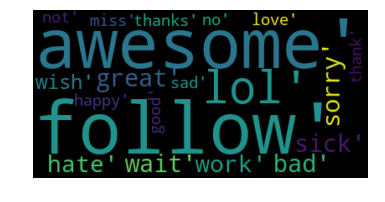

In [105]:
clft_dt = DecisionTreeClassifier(max_depth = 100 , min_samples_split= 100)
clft_dt.fit(std_tfidf_train, y_train);
prob = clft_dt.feature_importances_.argsort()
words = np.take(tf_idf_vect.get_feature_names(), prob[-20:])
wordcloud = WordCloud().generate(str(words))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

####  Top 20 important features of negative class

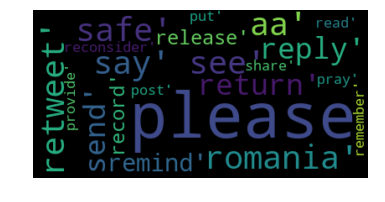

In [106]:
clft_dt = DecisionTreeClassifier(max_depth = 100 , min_samples_split= 100)
clft_dt.fit(std_tfidf_train, y_train);
prob = clft_dt.feature_importances_.argsort()
words = np.take(tf_idf_vect.get_feature_names(), prob[:20])
wordcloud = WordCloud().generate(str(words))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

###  Graphviz visualization of Decision Tree on TFIDF

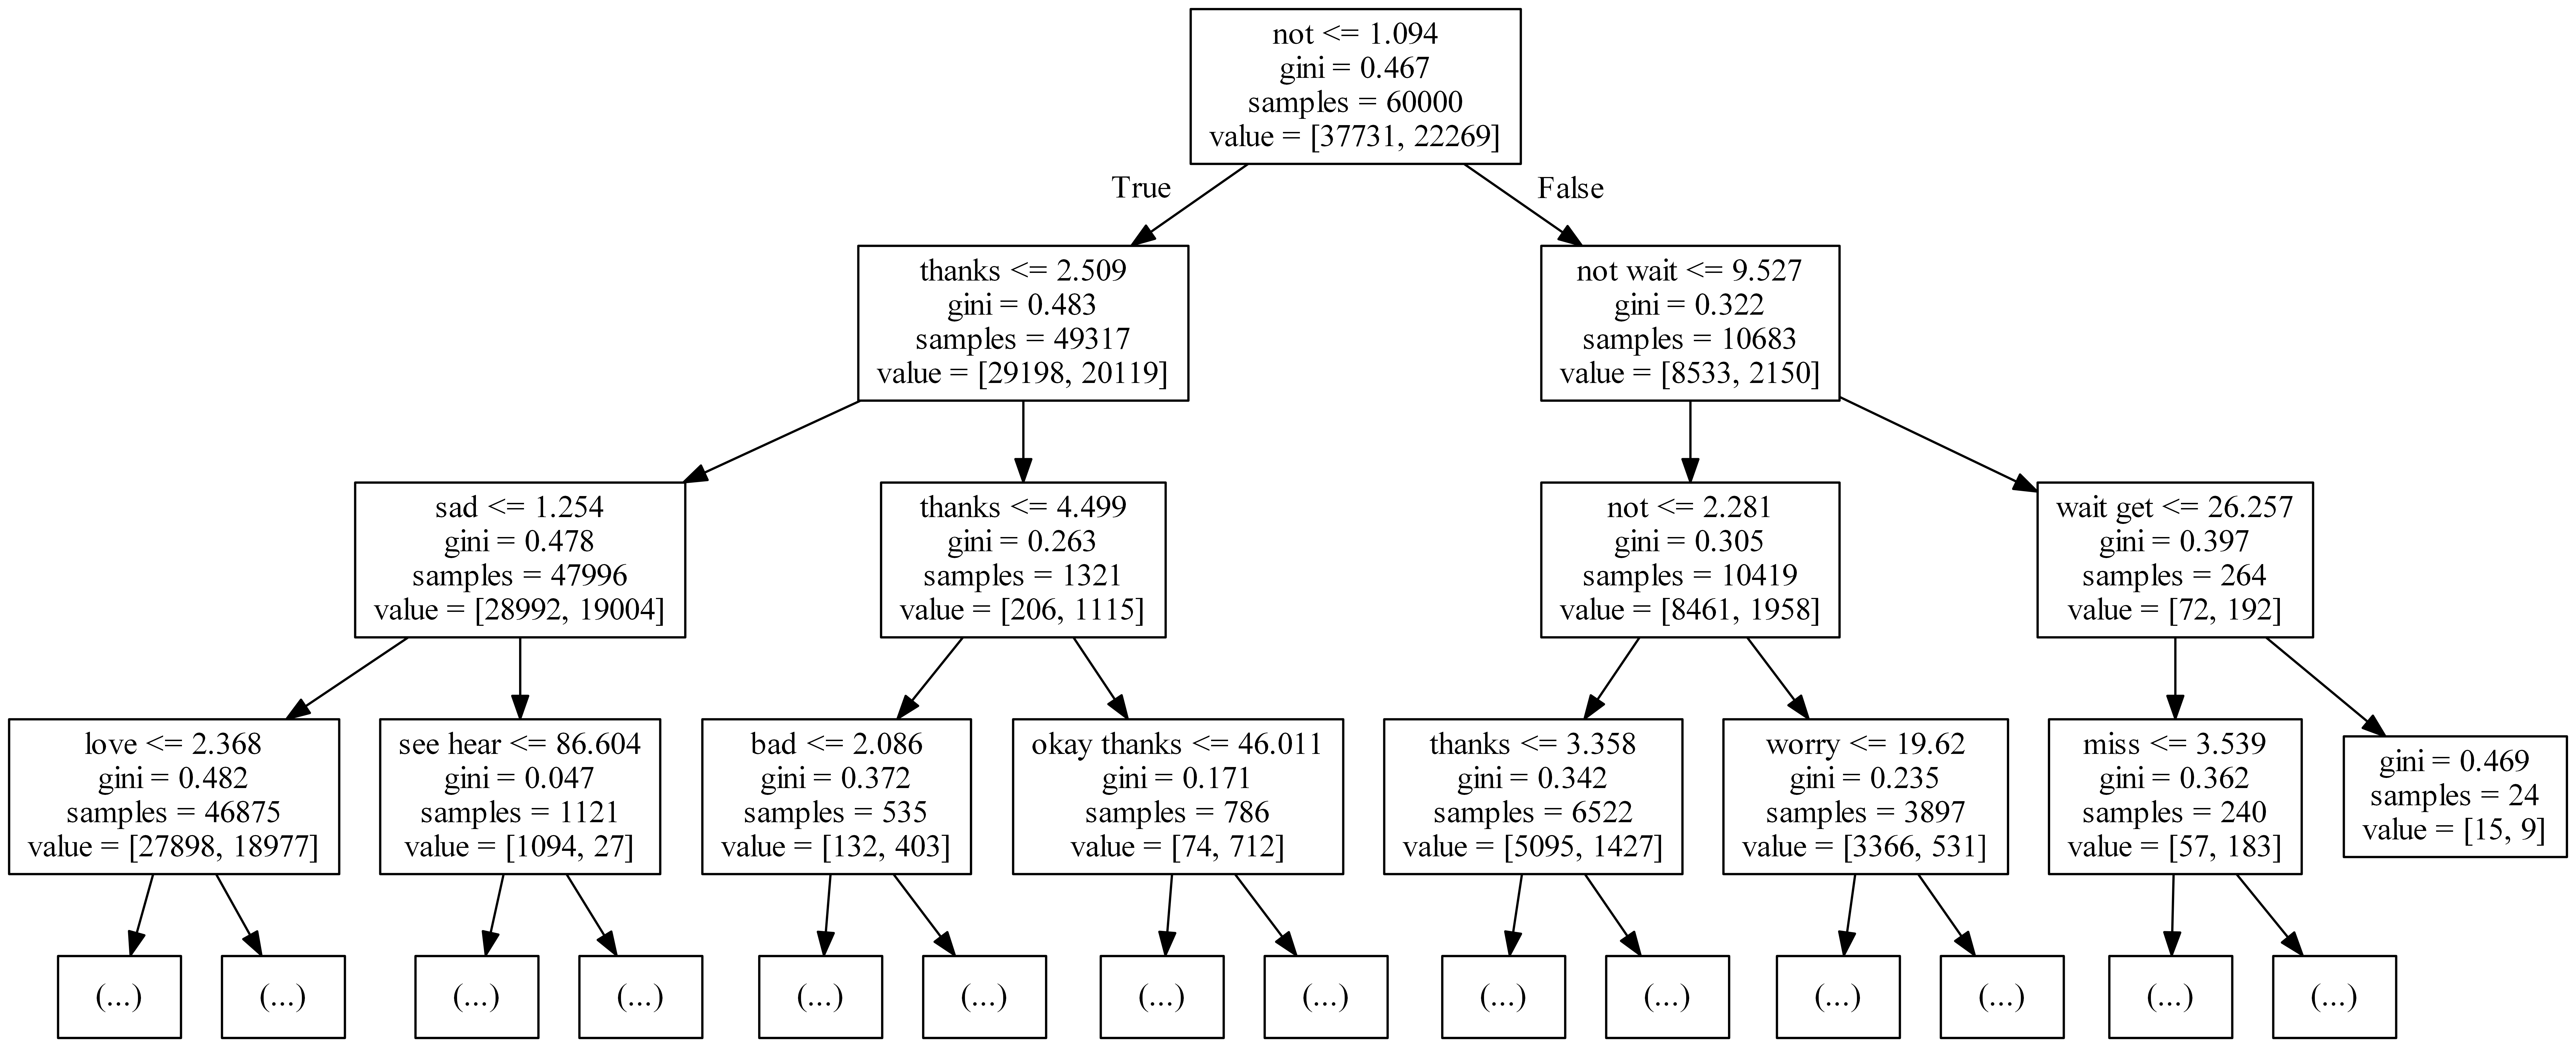

In [107]:
clft_dt = clft_dt.fit(std_tfidf_train, y_train)
export_graphviz(clft_dt, out_file='tree.dot' ,max_depth=3, feature_names= tf_idf_vect.get_feature_names())
!dot -Tpng tree.dot -o tree_tsne.png -Gdpi=600
Image(filename = 'tree_tsne.png')

## Applying Decision Trees on AVG W2V

# Hyperparameter Tuning

In [108]:
max_depth = [1,5,10,50,100,500]
min_samples_split = [5,10,100,500]

parameters= [{'max_depth': [1,5,10,50,100,500], 'min_samples_split': [5,10,100,500]}]
clfw_dt = GridSearchCV(DecisionTreeClassifier(), parameters, scoring='roc_auc', cv=5)
clfw_dt.fit(std_avgw2v_train, y_train)
scores_avgw2v_train = clfw_dt.cv_results_['mean_test_score'].reshape(len(max_depth),len(min_samples_split))

In [109]:
max_depth = [1,5,10,50,100,500]
min_samples_split = [5,10,100,500]

parameters= [{'max_depth': [1,5,10,50,100,500], 'min_samples_split': [5,10,100,500]}]
clfw_dt = GridSearchCV(DecisionTreeClassifier(), parameters, scoring='roc_auc', cv=5)
clfw_dt.fit(std_avgw2v_cv, y_cv)
scores_avgw2v_cv = clfw_dt.cv_results_['mean_test_score'].reshape(len(max_depth),len(min_samples_split))

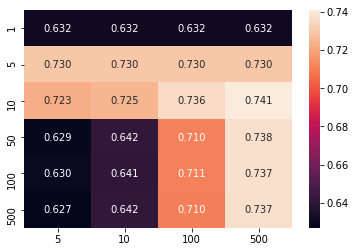

In [110]:
df_avgw2v_train = pd.DataFrame(scores_avgw2v_train ,index=max_depth, columns=min_samples_split)
ax = sns.heatmap(df_avgw2v_train, annot=True, fmt='.3f')

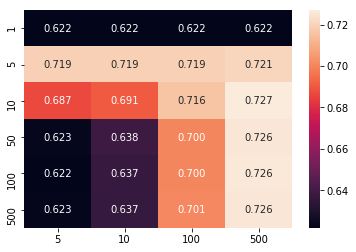

In [111]:
df_avgw2v_cv = pd.DataFrame(scores_avgw2v_cv ,index=max_depth, columns=min_samples_split)
ax = sns.heatmap(df_avgw2v_cv, annot=True, fmt='.3f')

- Selecting max_depth = 100 , min_samples_split= 100 from above heatplots

In [113]:
clfw_dt = DecisionTreeClassifier(max_depth = 100 , min_samples_split= 100)
clfw_dt_sigmoid = CalibratedClassifierCV(clfw_dt, cv=5, method='sigmoid')
clfw_dt_sigmoid.fit(std_avgw2v_train,y_train)
pred_avgw2v = clfw_dt_sigmoid.predict_proba(std_avgw2v_test)[:,1]
roc_auc = roc_auc_score(y_test, pred_avgw2v, average='micro')
print('\n****Test roc_auc_score for max_depth = 100 and min_samples_split = 100 is %f' % (roc_auc))


****Test roc_auc_score for max_depth = 100 and min_samples_split = 100 is 0.762939


# ROC-AUC Curve

In [ ]:
#https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

y_pred_train = clfw_dt_sigmoid.predict_proba(std_avgw2v_train)[:,1]
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_train)

y_pred_test = clfw_dt_sigmoid.predict_proba(std_avgw2v_test)[:,1]
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test)

plt.title('Receiver Operating Characteristic')
plt.figure(1)
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr_train,tpr_train, label='DecisionTree_train')
plt.plot(fpr_test,tpr_test, label='DecisionTree_test')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC curve')
plt.legend(loc = 'lower right')
plt.show()

# Confusion Matrix

------------------------------ Confusion matrix ------------------------------


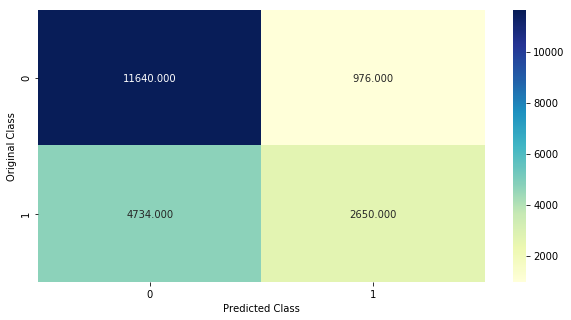

In [115]:
# Case Study : Personalized Cancer Diagnosis
pred_avgw2v = clfw_dt_sigmoid.predict(std_avgw2v_test)

def plot_confusion_matrix(y_test, pred_avgw2v):
    C = confusion_matrix(y_test, pred_avgw2v)
    labels = [0,1]
    print("-"*30, "Confusion matrix", "-"*30)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
plot_confusion_matrix(y_test, pred_avgw2v)

##  Applying Random Forests

### Applying Random Forests on BOW

In [117]:
from sklearn.ensemble import RandomForestClassifier

# Hyperparameter Tuning

In [118]:
n_estimators = [25,50,75,100,150,200]
max_depth = [1,5,10,50,100]
parameters= [{'n_estimators': [25,50,75,100,150,200] , 'max_depth': [1,5,10,50,100] }]
clfb_rf = GridSearchCV(RandomForestClassifier(class_weight="balanced"), parameters, scoring='roc_auc', cv=5)
clfb_rf.fit(std_bow_train, y_train)
scores_bow_train = clfb_rf.cv_results_['mean_test_score'].reshape(len(n_estimators),len(max_depth))

In [119]:
n_estimators = [25,50,75,100,150,200]
max_depth = [1,5,10,50,100]

parameters= [{'n_estimators': [25,50,75,100,150,200] , 'max_depth': [1,5,10,50,100] }]
clfb_rf = GridSearchCV(RandomForestClassifier(class_weight="balanced"), parameters, scoring='roc_auc', cv=5)
clfb_rf.fit(std_bow_cv, y_cv)
scores_bow_cv = clfb_rf.cv_results_['mean_test_score'].reshape(len(n_estimators),len(max_depth))

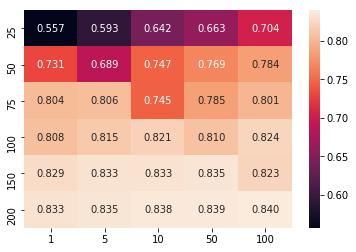

In [120]:
df_bow_train = pd.DataFrame(scores_bow_train ,index=n_estimators, columns=max_depth)
ax = sns.heatmap(df_bow_train, annot=True, fmt='.3f')

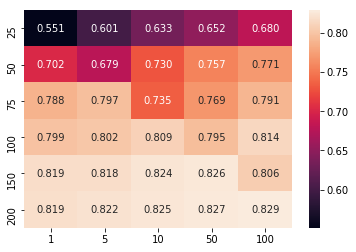

In [121]:
df_bow_cv = pd.DataFrame(scores_bow_cv ,index=n_estimators, columns=max_depth)
ax = sns.heatmap(df_bow_cv, annot=True, fmt='.3f')

- Selecting n_estimators = 150,max_depth = 50 from above heatplots

In [123]:
clfb_rf = RandomForestClassifier(n_estimators = 150,max_depth = 50)
clfb_rf_sigmoid = CalibratedClassifierCV(clfb_rf, cv=5, method='sigmoid')
clfb_rf_sigmoid.fit(std_bow_train,y_train)
pred_bow = clfb_rf_sigmoid.predict_proba(std_bow_test)[:,1]
roc_auc = roc_auc_score(y_test, pred_bow, average='micro')
print('\n****Test roc_auc_score for n_estimators = 150 and max_depth = 50 is %f' % (roc_auc))


****Test roc_auc_score for n_estimators = 150 and max_depth = 50 is 0.836367


# ROC-AUC Curve

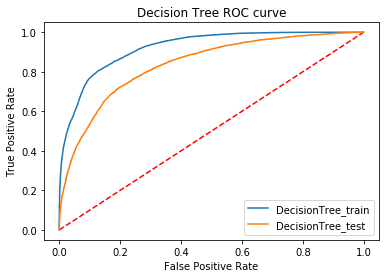

In [124]:
#https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

y_pred_train = clfb_rf_sigmoid.predict_proba(std_bow_train)[:,1]
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_train)

y_pred_test = clfb_rf_sigmoid.predict_proba(std_bow_test)[:,1]
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test)

plt.title('Receiver Operating Characteristic')
plt.figure(1)
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr_train,tpr_train, label='DecisionTree_train')
plt.plot(fpr_test,tpr_test, label='DecisionTree_test')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC curve')
plt.legend(loc = 'lower right')
plt.show()

## Confusion Matrix

------------------------------ Confusion matrix ------------------------------


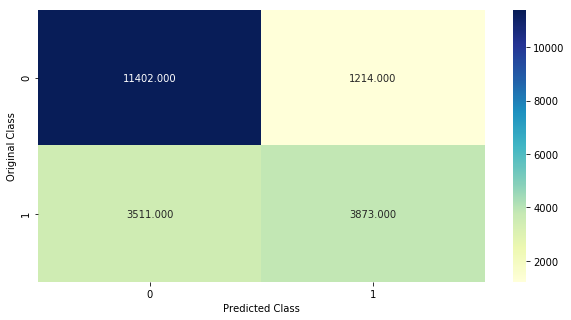

In [125]:
# Case Study : Personalized Cancer Diagnosis
pred_bow = clfb_rf_sigmoid.predict(std_bow_test)

def plot_confusion_matrix(y_test, pred_bow):
    C = confusion_matrix(y_test, pred_bow)
    labels = [0,1]
    print("-"*30, "Confusion matrix", "-"*30)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
plot_confusion_matrix(y_test, pred_bow)

###  Wordcloud of top 20 positive important features

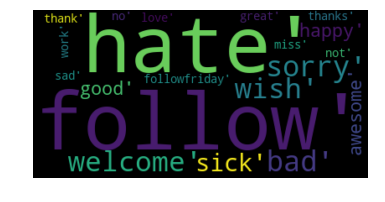

In [126]:
clfb_rf = RandomForestClassifier(n_estimators = 150,max_depth = 50)
clfb_rf.fit(std_bow_train,y_train)
prob = clfb_rf.feature_importances_.argsort()
words = np.take(count_vect.get_feature_names(), prob[-20:])

wordcloud = WordCloud().generate(str(words))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

###  Wordcloud of top 20 negative important features

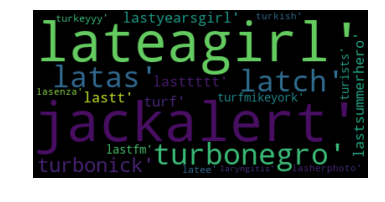

In [127]:
clfb_rf = RandomForestClassifier(n_estimators = 150,max_depth = 50)
clfb_rf.fit(std_bow_train,y_train)
prob = clfb_rf.feature_importances_.argsort()
words = np.take(count_vect.get_feature_names(), prob[:20])

wordcloud = WordCloud().generate(str(words))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

###  Applying Random Forests on TFIDF

# Hyperparameter Tuning

In [128]:
n_estimators = [25,50,75,100,150,200]
max_depth = [1,5,10,50,100]

parameters= [{'n_estimators': [25,50,75,100,150,200] , 'max_depth': [1,5,10,50,100] }]
clft_rf = GridSearchCV(RandomForestClassifier(class_weight="balanced"), parameters, scoring='roc_auc', cv=5)
clft_rf.fit(std_tfidf_train, y_train)
scores_tfidf_train = clft_rf.cv_results_['mean_test_score'].reshape(len(n_estimators),len(max_depth))

In [129]:
n_estimators = [25,50,75,100,150,200]
max_depth = [1,5,10,50,100]

parameters= [{'n_estimators': [25,50,75,100,150,200] , 'max_depth': [1,5,10,50,100] }]
clft_rf = GridSearchCV(RandomForestClassifier(class_weight="balanced"), parameters, scoring='roc_auc', cv=5)
clft_rf.fit(std_tfidf_cv, y_cv)
scores_tfidf_cv = clft_rf.cv_results_['mean_test_score'].reshape(len(n_estimators),len(max_depth))

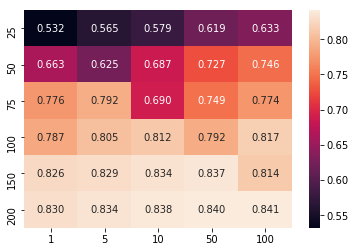

In [130]:
df_tfidf_train = pd.DataFrame(scores_tfidf_train ,index=n_estimators, columns=max_depth)
ax = sns.heatmap(df_tfidf_train, annot=True, fmt='.3f')

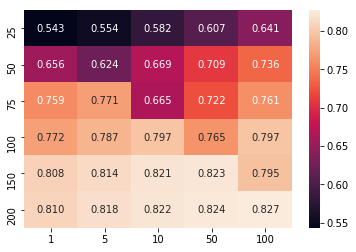

In [131]:
df_tfidf_cv = pd.DataFrame(scores_tfidf_cv ,index=n_estimators, columns=max_depth)
ax = sns.heatmap(df_tfidf_cv, annot=True, fmt='.3f')

- Selecting n_estimators = 150,max_depth = 10 from above heatplots

In [143]:
clft_rf = RandomForestClassifier(n_estimators = 150, max_depth = 10)
clft_rf_sigmoid = CalibratedClassifierCV(clft_rf, cv=5, method='sigmoid')
clft_rf_sigmoid.fit(std_tfidf_train,y_train)
pred_tfidf = clft_rf_sigmoid.predict_proba(std_tfidf_test)[:,1]
roc_auc = roc_auc_score(y_test, pred_tfidf, average='micro')
print('\n****Test roc_auc_score for n_estimators = 150 and max_depth = 10 is %f' % (roc_auc))


****Test roc_auc_score for n_estimators = 150 and max_depth = 10 is 0.828695


## ROC-AUC Curve

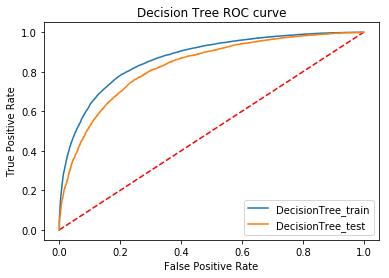

In [144]:
#https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

y_pred_train = clft_rf_sigmoid.predict_proba(std_tfidf_train)[:,1]
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_train)

y_pred_test = clft_rf_sigmoid.predict_proba(std_tfidf_test)[:,1]
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test)

plt.title('Receiver Operating Characteristic')
plt.figure(1)
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr_train,tpr_train, label='DecisionTree_train')
plt.plot(fpr_test,tpr_test, label='DecisionTree_test')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC curve')
plt.legend(loc = 'lower right')
plt.show()

## Confusion Matrix

------------------------------ Confusion matrix ------------------------------


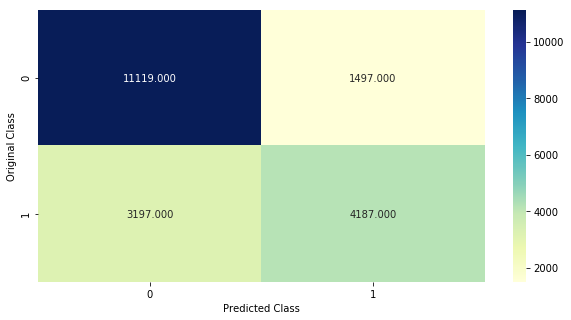

In [145]:
# Case Study : Personalized Cancer Diagnosis
pred_tfidf = clft_rf_sigmoid.predict(std_tfidf_test)

def plot_confusion_matrix(y_test, pred_tfidf):
    C = confusion_matrix(y_test, pred_tfidf)
    labels = [0,1]
    print("-"*30, "Confusion matrix", "-"*30)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
plot_confusion_matrix(y_test, pred_tfidf)

### Wordcloud of top 20 important positive features

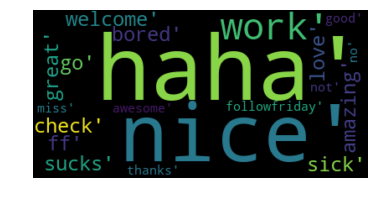

In [146]:
from wordcloud import WordCloud

clft_rf = RandomForestClassifier(n_estimators = 150,max_depth = 10)
clft_rf.fit(std_tfidf_train,y_train)
prob = clft_rf.feature_importances_.argsort()
words = np.take(tf_idf_vect.get_feature_names(), prob[-20:])

wordcloud = WordCloud().generate(str(words))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Wordcloud of top 20 important negative features

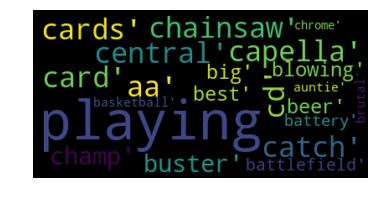

In [147]:
from wordcloud import WordCloud

clft_rf = RandomForestClassifier(n_estimators = 150,max_depth = 10)
clft_rf.fit(std_tfidf_train,y_train)
prob = clft_rf.feature_importances_.argsort()
words = np.take(tf_idf_vect.get_feature_names(), prob[:20])

wordcloud = WordCloud().generate(str(words))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Applying Random Forests on AVG W2V

# Hyperparameter Tuning

In [132]:
n_estimators = [25,50,75,100,150,200]
max_depth = [1,5,10,50,100]

parameters= [{'n_estimators': [25,50,75,100,150,200] , 'max_depth': [1,5,10,50,100] }]
clfw_rf = GridSearchCV(RandomForestClassifier(class_weight="balanced"), parameters, scoring='roc_auc', cv=5)
clfw_rf.fit(std_avgw2v_train, y_train)
scores_avgw2v_train = clfw_rf.cv_results_['mean_test_score'].reshape(len(n_estimators),len(max_depth))

In [133]:
n_estimators = [25,50,75,100,150,200]
max_depth = [1,5,10,50,100]

parameters= [{'n_estimators': [25,50,75,100,150,200] , 'max_depth': [1,5,10,50,100] }]
clfw_rf = GridSearchCV(RandomForestClassifier(class_weight="balanced"), parameters, scoring='roc_auc', cv=5)
clfw_rf.fit(std_avgw2v_cv, y_cv)
scores_avgw2v_cv = clfw_rf.cv_results_['mean_test_score'].reshape(len(n_estimators),len(max_depth))

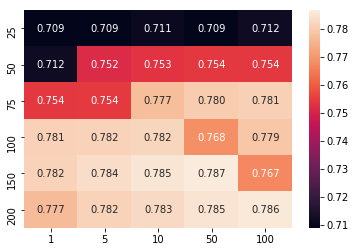

In [134]:
df_avgw2v_train = pd.DataFrame(scores_avgw2v_train ,index=n_estimators, columns=max_depth)
ax = sns.heatmap(df_avgw2v_train, annot=True, fmt='.3f')

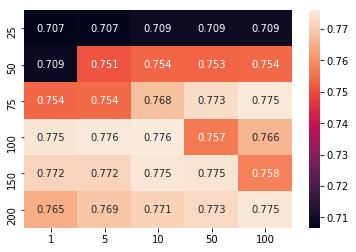

In [135]:
df_avgw2v_cv = pd.DataFrame(scores_avgw2v_cv ,index=n_estimators, columns=max_depth)
ax = sns.heatmap(df_avgw2v_cv, annot=True, fmt='.3f')

- Selecting n_estimators = 150,max_depth = 50 from above heatplots

In [148]:
clfw_rf = RandomForestClassifier(n_estimators = 150, max_depth = 50)
clfw_rf_sigmoid = CalibratedClassifierCV(clfw_rf, cv=5, method='sigmoid')
clfw_rf_sigmoid.fit(std_avgw2v_train,y_train)
pred_avgw2v = clfw_rf_sigmoid.predict_proba(std_avgw2v_test)[:,1]
roc_auc = roc_auc_score(y_test, pred_avgw2v, average='micro')
print('\n****Test roc_auc_score for n_estimators = 150 and max_depth = 50 is %f' % (roc_auc))


****Test roc_auc_score for n_estimators = 150 and max_depth = 50 is 0.789117


## ROC-AUC Curve

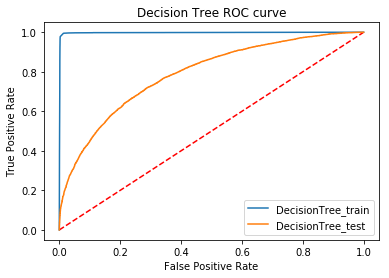

In [149]:
#https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

y_pred_train = clfw_rf_sigmoid.predict_proba(std_avgw2v_train)[:,1]
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_train)

y_pred_test = clfw_rf_sigmoid.predict_proba(std_avgw2v_test)[:,1]
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test)

plt.title('Receiver Operating Characteristic')
plt.figure(1)
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr_train,tpr_train, label='DecisionTree_train')
plt.plot(fpr_test,tpr_test, label='DecisionTree_test')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC curve')
plt.legend(loc = 'lower right')
plt.show()

## Confusion Matrix

------------------------------ Confusion matrix ------------------------------


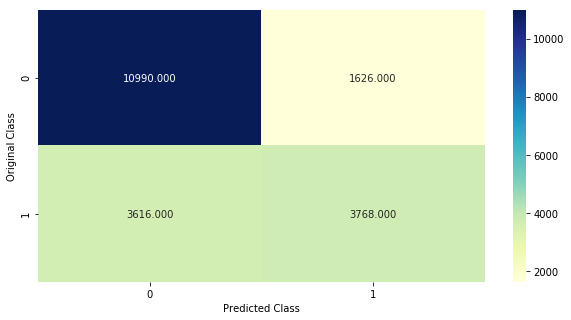

In [150]:
# Case Study : Personalized Cancer Diagnosis
pred_avgw2v = clfw_rf_sigmoid.predict(std_avgw2v_test)

def plot_confusion_matrix(y_test, pred_avgw2v):
    C = confusion_matrix(y_test, pred_avgw2v)
    labels = [0,1]
    print("-"*30, "Confusion matrix", "-"*30)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
plot_confusion_matrix(y_test, pred_avgw2v)

In [160]:
from prettytable import PrettyTable

In [162]:
x = PrettyTable()

x.field_names = ["Vectorizer","Algorithms","C", "max_depth", "min_samples_split","n_estimators", "AUC"]

x.add_row(["BOW", "Logistic Regression", 10 ,'','','', 0.712512 ])

x.add_row(["BOW", "Decision Trees" ,'', 100 ,100,'', 0.785787 ])

x.add_row(["BOW", "Random Forests",'', 50,'',150,  0.836367 ])

x.add_row(["TFIDF", "Logistic Regression",10,'','','',0.807784])

x.add_row(["TFIDF", "Decision Trees",'', 100 ,100,'', 0.778910 ])

x.add_row(["TFIDF", "Random Forests",'', 10 , 150, '', 0.828695])

x.add_row(["AvgW2V", "Logistic Regression", 0.01,'','','',0.780950 ])

x.add_row(["AvgW2V", "Decision Trees",'', 100 ,100,'', 0.762939])

x.add_row(["AvgW2V", "Random Forests",'',50 , '',150, 0.789117])


print(x)

+------------+---------------------+------+-----------+-------------------+--------------+----------+
| Vectorizer |      Algorithms     |  C   | max_depth | min_samples_split | n_estimators |   AUC    |
+------------+---------------------+------+-----------+-------------------+--------------+----------+
|    BOW     | Logistic Regression |  10  |           |                   |              | 0.712512 |
|    BOW     |    Decision Trees   |      |    100    |        100        |              | 0.785787 |
|    BOW     |    Random Forests   |      |     50    |                   |     150      | 0.836367 |
|   TFIDF    | Logistic Regression |  10  |           |                   |              | 0.807784 |
|   TFIDF    |    Decision Trees   |      |    100    |        100        |              | 0.77891  |
|   TFIDF    |    Random Forests   |      |     10    |        150        |              | 0.828695 |
|   AvgW2V   | Logistic Regression | 0.01 |           |                   |       